In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import anndata as ad
import squidpy as sq
import scanpy as sc

import os

from matplotlib import pyplot as plt

In [20]:
FILEPATHBASE = '/Users/mmd47/Library/CloudStorage/GoogleDrive-mmd47@yale.edu/My Drive/DiStasio Lab/DiStasio Lab Share/'
FILEPATHBASE = '/home/mdistasio/YaleGoogleDrive/DiStasio Lab/DiStasio Lab Share/'

SAVEFIGS = True
if SAVEFIGS:
    IMGDIR = os.path.join(FILEPATHBASE,'02 Analysis/annData_ManualAnnotate/img/')


filename = os.path.join(FILEPATHBASE,'03 Data/Retina_SlideSeq_Curio/A22_3781_AMD_SlideSeq_001/A0052_029_anndata_annotated.h5ad')
adata = ad.read_h5ad(filename)

#library_id = 'A22_3781'
#adata.uns["spatial"] = dict()
#adata.uns["spatial"][library_id] = dict()
retina1 = adata[adata.obs['Retina_1']]
# Clean up the NAs in manual annotation columns in adata.obs, which should be boolean                                                                                                                                                                                                        
cs = retina1.obs.select_dtypes(include='object').columns                                                                                                                                                                                                                                       
retina1.obs[cs] = retina1.obs[cs].astype('boolean').fillna(False)   
#retina1.obs['Retina'] = retina1.obs['Retina_1']
#retina1.obs.drop('Retina_2')
retina2 = adata[adata.obs['Retina_2']]

#retina2.obs['Retina'] = retina2.obs['Retina_2']
#retina1.obs.drop('Retina_1')

filename = filename = os.path.join(FILEPATHBASE,'03 Data/Retina_SlideSeq_Curio/A23-914_OS_Ctrl_SlideSeq_001/A0052_030_anndata_annotated.h5ad')
adata = ad.read_h5ad(filename)

#library_id = 'A23-914'
#adata.uns["spatial"] = dict()
#adata.uns["spatial"][library_id] = dict()
retina3 = adata[adata.obs['Retina']]


filename = filename = os.path.join(FILEPATHBASE,'03 Data/Retina_SlideSeq_Curio/A23-1277_AMD_SlideSeq_001/OUTPUT/A23-1277-OS_macula/A23-1277-OS_macula_anndata_annotated.h5ad')
adata = ad.read_h5ad(filename)

#library_id = 'A23-1277'
#adata.uns["spatial"] = dict()
#adata.uns["spatial"][library_id] = dict()
retina4 = adata[adata.obs['Retina']]


filename = filename = os.path.join(FILEPATHBASE,'03 Data/Retina_SlideSeq_Curio/A23-1279-OS_SlideSeq_001/23-1279-OS_OUTPUT/OUTPUT/A23-1279-OS_macula/A23-1279-OS_macula_anndata_annotated.h5ad')
adata = ad.read_h5ad(filename)

library_id = 'A23-1279'
#adata.uns["spatial"] = dict()
#adata.uns["spatial"][library_id] = dict()
retina5 = adata[adata.obs['Retina']]

RecursionError: maximum recursion depth exceeded while calling a Python object

In [15]:
print(retina1)
print(retina2)
print(retina3)
print(retina4)
print(retina5)

View of AnnData object with n_obs × n_vars = 4376 × 21395
    obs: 'Retina_2', 'OpticNerve', 'Retina_1'
    obsm: 'X_spatial', 'spatial'
View of AnnData object with n_obs × n_vars = 5045 × 21395
    obs: 'Retina_2', 'OpticNerve', 'Retina_1'
    obsm: 'X_spatial', 'spatial'
View of AnnData object with n_obs × n_vars = 10492 × 22988
    obs: 'Retina'
    obsm: 'X_spatial', 'spatial'
View of AnnData object with n_obs × n_vars = 10820 × 21624
    obs: 'Retina'
    obsm: 'X_spatial', 'spatial'
View of AnnData object with n_obs × n_vars = 645 × 19492
    obs: 'Retina'
    obsm: 'X_spatial', 'spatial'


In [7]:
# Concatenation of all datasets into one

r_all = {"R1": retina1, "R2": retina2, "R3": retina3, "R4": retina4, "R5": retina5}
retinas_all = ad.concat(r_all, label="dataset", uns_merge="first", join='outer')

# Clean up the NAs in manual annotation columns in adata.obs, which should be boolean                                                                                                                                                                                                        
cs = retinas_all.obs.select_dtypes(include='object').columns                                                                                                                                                                                                                                       
retinas_all.obs[cs] = retinas_all.obs[cs].astype('boolean').fillna(False)                                                                                                                                                                                                                                
                                                                                                                                                                                                                                                                                             
retinas_all.raw = retinas_all                                                                                                                                                                                                                                                                           
retinas_all.layers["counts"] = retinas_all.X.copy()   

library_id = 'Curio_Seeker_v1.1_AllRetinas'
retinas_all.uns["spatial"] = dict()
retinas_all.uns["spatial"][library_id] = dict()

retinas_all

RecursionError: maximum recursion depth exceeded while calling a Python object

In [5]:
# Batch correction with Harmony
sc.tl.pca(retinas_all)
sc.external.pp.harmony_integrate(retinas_all, key='dataset')



2023-11-02 15:07:48,401 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-11-02 15:07:55,380 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-11-02 15:07:55,446 - harmonypy - INFO - Iteration 1 of 10
2023-11-02 15:07:59,695 - harmonypy - INFO - Iteration 2 of 10
2023-11-02 15:08:06,746 - harmonypy - INFO - Iteration 3 of 10
2023-11-02 15:08:11,069 - harmonypy - INFO - Iteration 4 of 10
2023-11-02 15:08:15,556 - harmonypy - INFO - Iteration 5 of 10
2023-11-02 15:08:19,907 - harmonypy - INFO - Iteration 6 of 10
2023-11-02 15:08:24,156 - harmonypy - INFO - Iteration 7 of 10
2023-11-02 15:08:28,336 - harmonypy - INFO - Converged after 7 iterations


In [ ]:
np.arange(0,10)

In [7]:
sc.pp.log1p(retinas_all)

## Clustering
print('Clustering...')

# Batch correction with Harmony
sc.tl.pca(retinas_all, svd_solver='arpack', n_comps=30)
sc.external.pp.harmony_integrate(retinas_all, key='dataset')

sc.pp.neighbors(retinas_all, n_neighbors=20, n_pcs=30, use_rep='X_pca_harmony')
sc.tl.leiden(retinas_all)
sc.tl.paga(retinas_all)
sc.pl.paga(retinas_all, plot=False)
sc.tl.umap(retinas_all, init_pos='paga')

print('Done!')

Clustering...


2023-11-02 15:08:29,491 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-11-02 15:08:31,667 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-11-02 15:08:31,736 - harmonypy - INFO - Iteration 1 of 10
2023-11-02 15:08:36,318 - harmonypy - INFO - Iteration 2 of 10
2023-11-02 15:08:41,006 - harmonypy - INFO - Iteration 3 of 10
2023-11-02 15:08:45,920 - harmonypy - INFO - Iteration 4 of 10
2023-11-02 15:08:51,063 - harmonypy - INFO - Iteration 5 of 10
2023-11-02 15:08:55,331 - harmonypy - INFO - Iteration 6 of 10
2023-11-02 15:08:59,566 - harmonypy - INFO - Iteration 7 of 10
2023-11-02 15:09:03,578 - harmonypy - INFO - Iteration 8 of 10
2023-11-02 15:09:05,996 - harmonypy - INFO - Iteration 9 of 10
2023-11-02 15:09:08,140 - harmonypy - INFO - Iteration 10 of 10
2023-11-02 15:09:10,180 - harmonypy - INFO - Stopped before convergence
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Done!


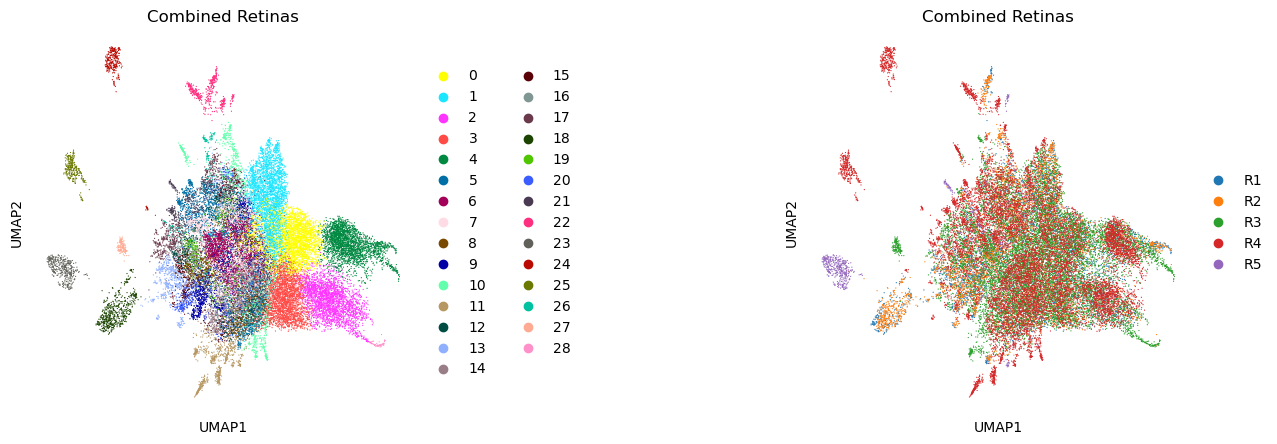

In [8]:
fig, axx = plt.subplots(1, 2, figsize=(15,5),  gridspec_kw={'wspace': 1})
sc.pl.umap(retinas_all, color="leiden", size=3, ax=axx[0], show=False)
sc.pl.umap(retinas_all, color="dataset", size=3, ax=axx[1], show=False)
for ax in axx:
    ax.set_title('Combined Retinas')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'UMAP_Leiden_and_dataset_-_AllRetinas.png'), dpi=300)




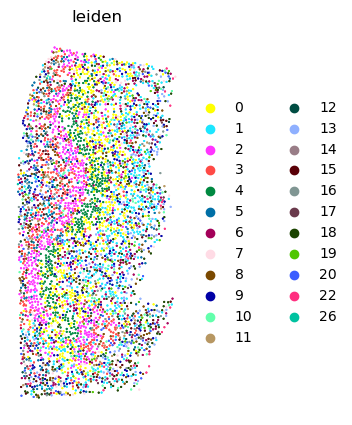

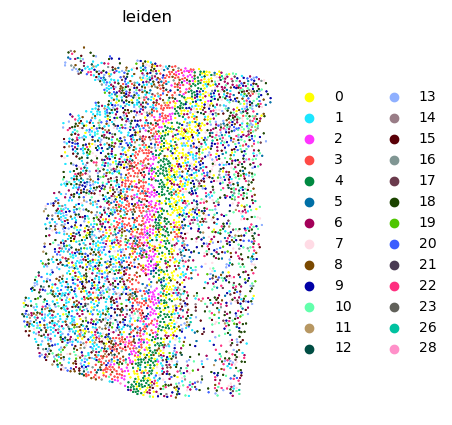

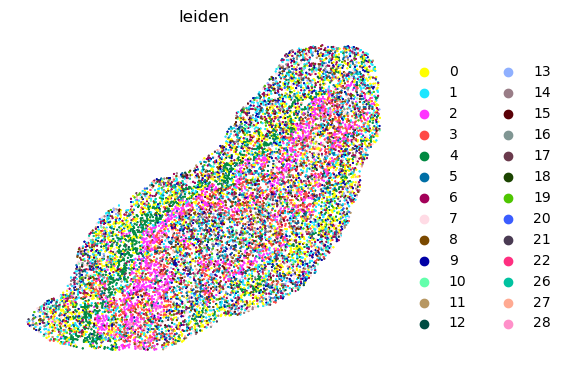

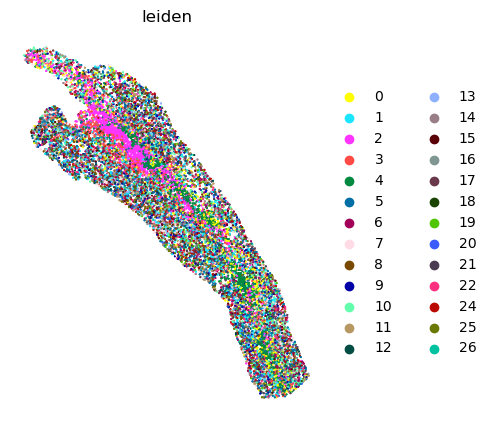

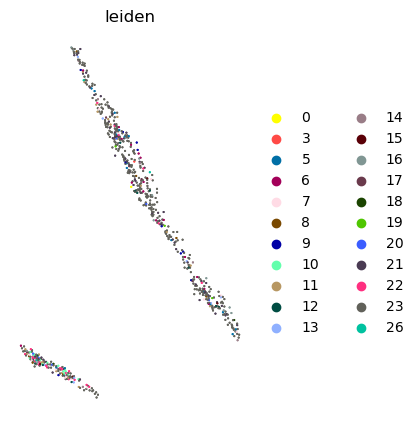

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R1'], color="leiden", size=1, shape=None, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_1.png'), dpi=300)

fig, ax = plt.subplots(figsize=(5,5))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R2'], color="leiden", size=1, shape=None, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_2.png'), dpi=300)

fig, ax = plt.subplots(figsize=(5,5))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R3'], color="leiden", size=1, shape=None, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_3.png'), dpi=300)
    
fig, ax = plt.subplots(figsize=(5,5))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R4'], color="leiden", size=1, shape=None, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_4.png'), dpi=300)    
    
fig, ax = plt.subplots(figsize=(5,5))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R5'], color="leiden", size=1, shape=None, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_Leiden_-_Retina_5.png'), dpi=300)    

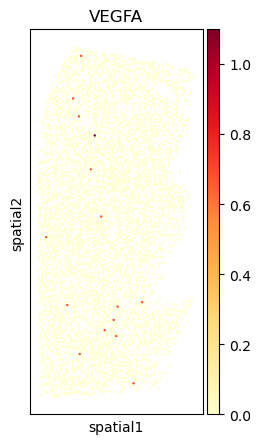

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R1'], color="VEGFA", size=1, cmap='YlOrRd', shape=None, ax=ax)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'OUTPUT_GENEPLOT_-_VEGFA.png'), dpi=300)

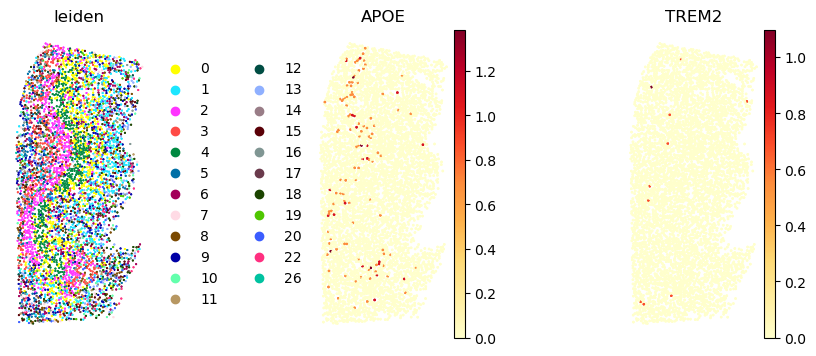

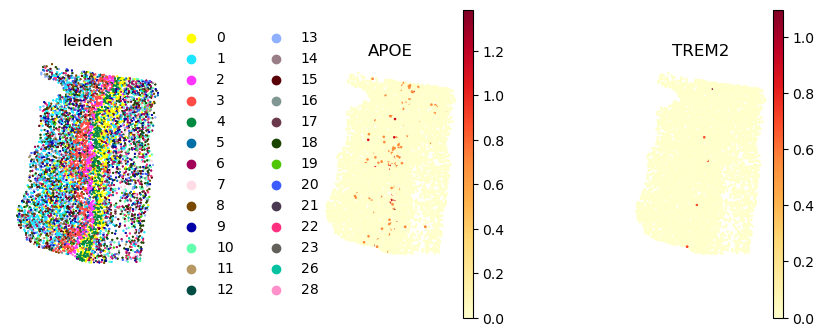

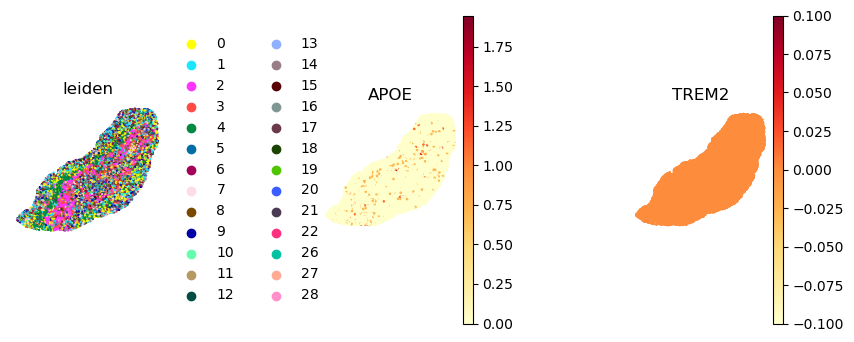

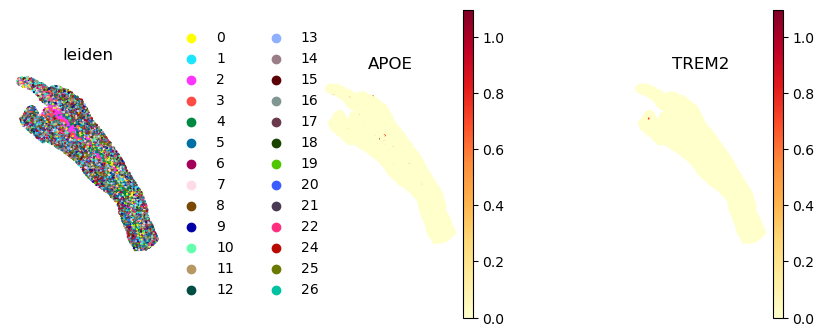

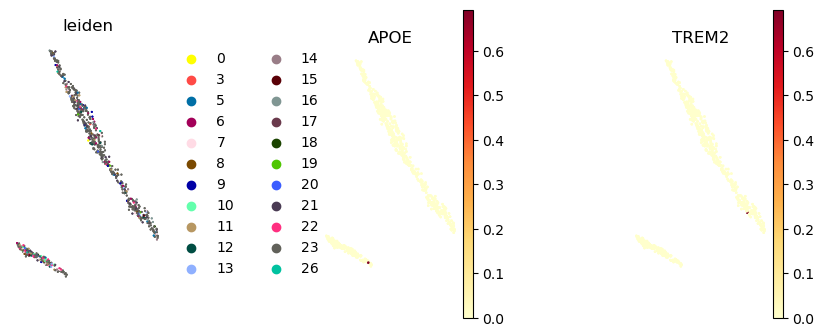

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3,  gridspec_kw={'wspace': 1}, figsize=(10,4))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R1'], color="leiden", size=1, shape=None, ax=ax[0])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R1'], color="APOE", size=3, shape=None, cmap='YlOrRd', ax=ax[1])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R1'], color="TREM2", size=3, shape=None, cmap='YlOrRd',ax=ax[2])
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_APOE_TREM2_-_Retina_1.png'), dpi=300)

fig, ax = plt.subplots(nrows=1, ncols=3,  gridspec_kw={'wspace': 1}, figsize=(10,4))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R2'], color="leiden", size=1, shape=None, ax=ax[0])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R2'], color="APOE", size=3, cmap='YlOrRd', shape=None, ax=ax[1])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R2'], color="TREM2", size=3, cmap='YlOrRd', shape=None, ax=ax[2])
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_APOE_TREM2_-_Retina_2.png'), dpi=300)

fig, ax = plt.subplots(nrows=1, ncols=3,  gridspec_kw={'wspace': 1}, figsize=(10,4))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R3'], color="leiden", size=1, shape=None, ax=ax[0])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R3'], color="APOE", size=3, cmap='YlOrRd', shape=None, ax=ax[1])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R3'], color="TREM2", size=3, cmap='YlOrRd', shape=None, ax=ax[2])
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_APOE_TREM2_-_Retina_3.png'), dpi=300)
    
    
    
fig, ax = plt.subplots(nrows=1, ncols=3,  gridspec_kw={'wspace': 1}, figsize=(10,4))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R4'], color="leiden", size=1, shape=None, ax=ax[0])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R4'], color="APOE", size=3, cmap='YlOrRd', shape=None, ax=ax[1])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R4'], color="TREM2", size=3, cmap='YlOrRd', shape=None, ax=ax[2])
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_APOE_TREM2_-_Retina_4.png'), dpi=300)    
    
    
fig, ax = plt.subplots(nrows=1, ncols=3,  gridspec_kw={'wspace': 1}, figsize=(10,4))
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R5'], color="leiden", size=1, shape=None, ax=ax[0])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R5'], color="APOE", size=3, cmap='YlOrRd', shape=None, ax=ax[1])
sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R5'], color="TREM2", size=3, cmap='YlOrRd', shape=None, ax=ax[2])
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_APOE_TREM2_-_Retina_5.png'), dpi=300)   

NameError: name 'SAVEFIGS' is not defined

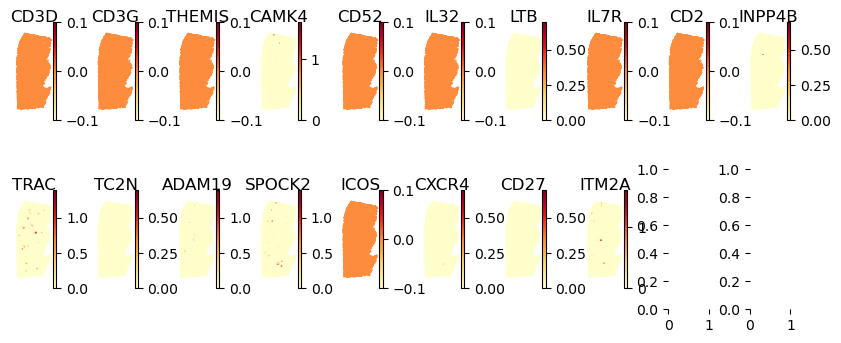

In [14]:
import json
import numpy as np


#import re
#gene_pattern = 'CD'
#gene_regex = re.compile(gene_pattern)
#matching_genes = [gene_name for gene_name in retinas_all.var_names if gene_regex.search(gene_name)]

with open(os.path.join(FILEPATHBASE,'02 Analysis/annData_ManualAnnotate/data/tcell_celltype_gates.json')) as f:                                                                                                                                                                                                                               
    gates = json.load(f)                                                                                                                                                                                                                                                                     
                                                                                                                                                                                                                                                                                             
characteristic_genes = [g['gene'] for ct in gates for g in ct['gates']]       
matching_genes = [gene_name for gene_name in characteristic_genes if  gene_name in retinas_all.var_names]




fig, ax = plt.subplots(ncols=int(np.floor(len(matching_genes)/2))+1, nrows=2,  gridspec_kw={'wspace': 1}, figsize=(10,4))
ax = ax.reshape(-1)
a = 0
for gene in matching_genes:
    sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R1'],  color=gene, size=1, cmap='YlOrRd', shape=None, ax=ax[a])
    a=a+1
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)    
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_T-cell_markers_-_Retina_1.png'), dpi=300)



fig, ax = plt.subplots(ncols=int(np.floor(len(matching_genes)/2))+1, nrows=2,  gridspec_kw={'wspace': 1}, figsize=(10,4))
ax = ax.reshape(-1)
a = 0
for gene in matching_genes:
    sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R2'],  color=gene, size=1, cmap='YlOrRd', shape=None, ax=ax[a])
    a=a+1
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)    
if SAVEFIGS:
    fig.savefig(os.path.join(IMGDIR, 'Spatial_T-cell_markers_-_Retina_2.png'), dpi=300)



fig, ax = plt.subplots(ncols=int(np.floor(len(matching_genes)/2))+1, nrows=2,  gridspec_kw={'wspace': 1}, figsize=(10,4))
ax = ax.reshape(-1)
a = 0
for gene in matching_genes:
    sq.pl.spatial_scatter(retinas_all[retinas_all.obs['dataset']=='R3'],  color=gene, size=1, cmap='YlOrRd', shape=None, ax=ax[a])
    a=a+1
for axx in ax:
    axx.set_xlabel('')
    axx.set_ylabel('')
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.spines['left'].set_visible(False)    
if SAVEFIGS:    
    fig.savefig(os.path.join(IMGDIR, 'Spatial_T-cell_markers_-_Retina_3.png'), dpi=300)

In [57]:
retinas_all.obs["T-cell score"] = np.array(np.sum(retinas_all[:,matching_genes].X > 0, axis=1) > 0, dtype=int)

In [102]:
import pandas as pd
import geopandas as gpd
import pysal.lib
import pysal.explore
import libpysal
from shapely.geometry import Point

spatial_coords = pd.DataFrame({
    'x': retinas_all.obsm['X_spatial'][:,0],
    'y': retinas_all.obsm['X_spatial'][:,1]
})

# Create a GeoDataFrame from the spatial coordinates DataFrame
geometry = gpd.points_from_xy(spatial_coords['x'], spatial_coords['y'])
gdf = gpd.GeoDataFrame(spatial_coords, geometry=geometry)

# Calculate spatial weights based on the spatial coordinates
w = libpysal.weights.Queen.from_dataframe(gdf)

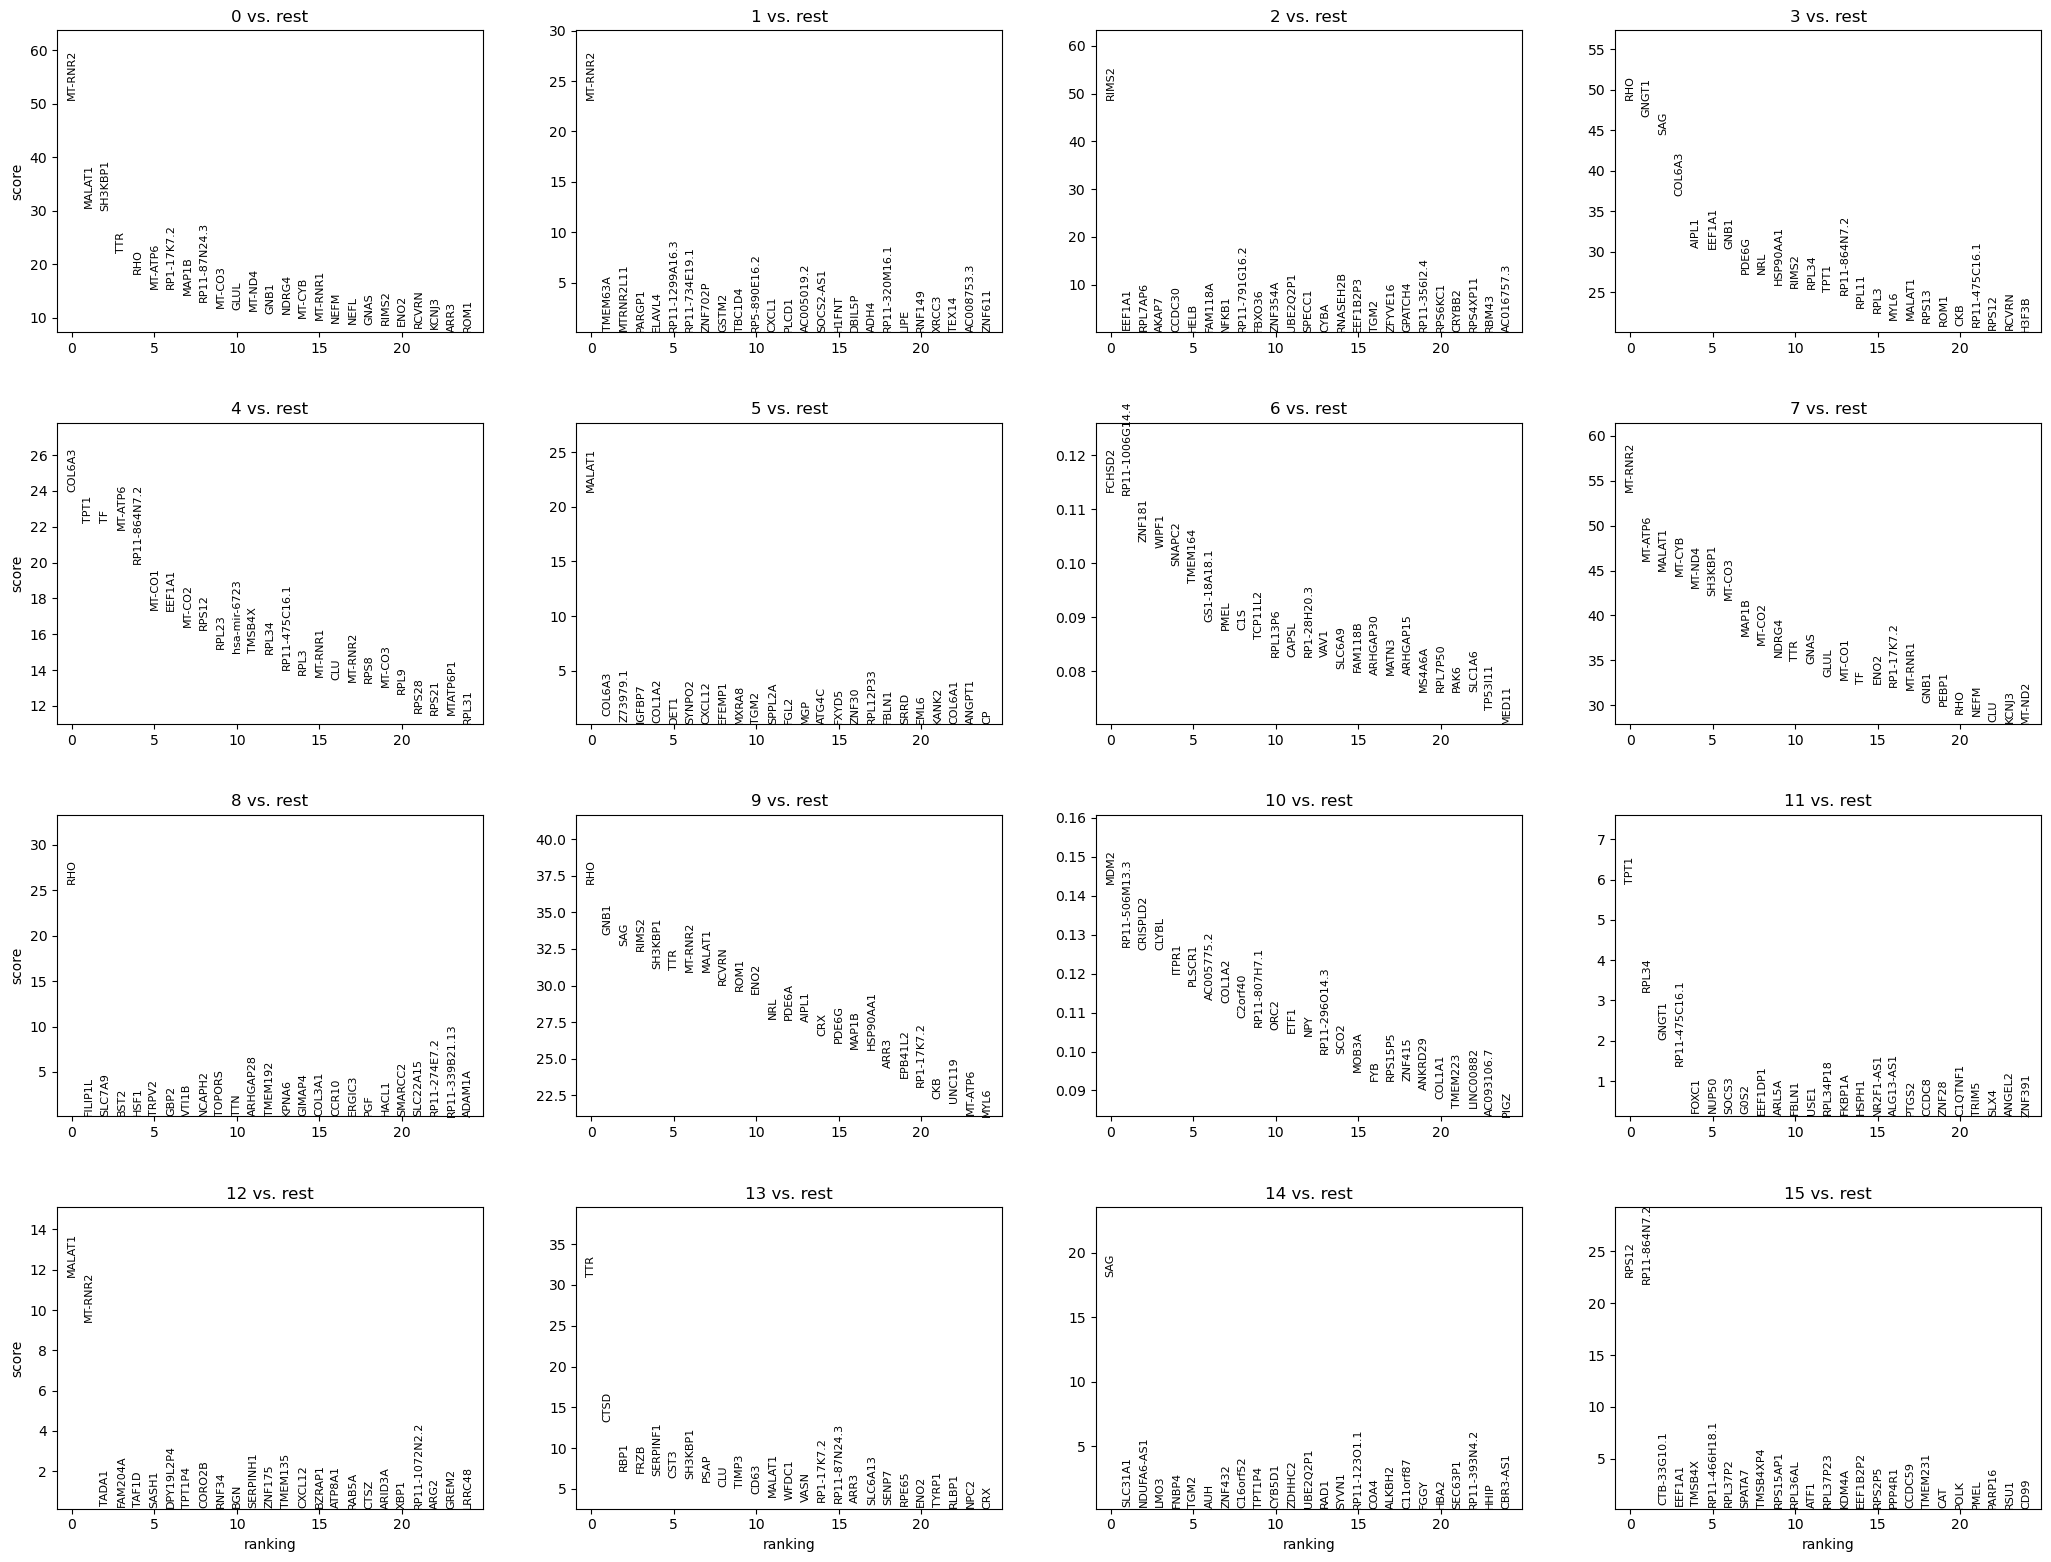

In [92]:
sc.tl.rank_genes_groups(retinas_all, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(retinas_all, n_genes=25, sharey=False)

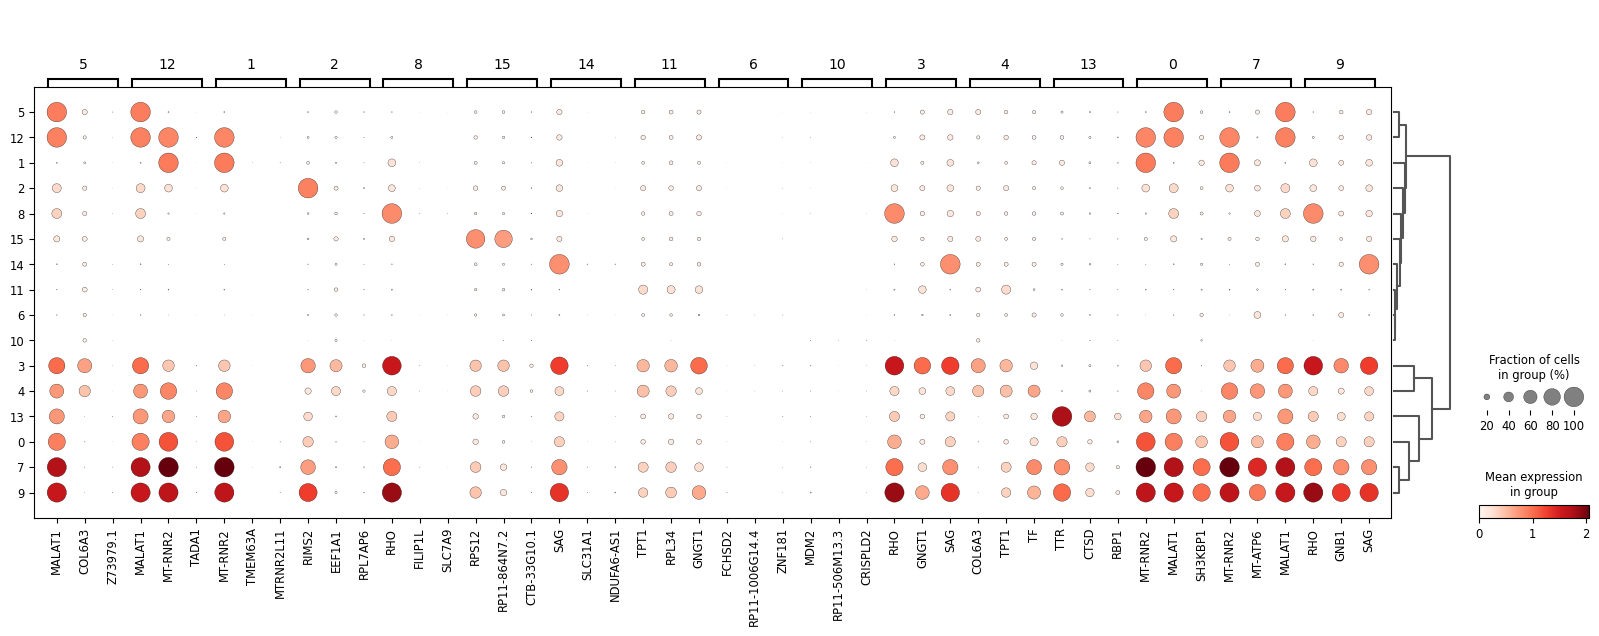

In [93]:
sc.pl.rank_genes_groups_dotplot(retinas_all, n_genes=3)

In [14]:


## Clustering
print('Clustering...')
sc.tl.pca(retina1, svd_solver='arpack', n_comps=30)
sc.pp.neighbors(retina1, n_neighbors=20, n_pcs=30)
sc.tl.leiden(retina1)
sc.tl.paga(retina1)
sc.pl.paga(retina1, plot=False)
sc.tl.umap(retina1, init_pos='paga')

print('Done!')



## Clustering
print('Clustering...')
sc.tl.pca(retina2, svd_solver='arpack', n_comps=30)
sc.pp.neighbors(retina2, n_neighbors=20, n_pcs=30)
sc.tl.leiden(retina2)
sc.tl.paga(retina2)
sc.pl.paga(retina2, plot=False)
sc.tl.umap(retina2, init_pos='paga')

print('Done!')



## Clustering
print('Clustering...')
sc.tl.pca(retina3, svd_solver='arpack', n_comps=30)
sc.pp.neighbors(retina3, n_neighbors=20, n_pcs=30)
sc.tl.leiden(retina3)
sc.tl.paga(retina3)
sc.pl.paga(retina3, plot=False)
sc.tl.umap(retina3, init_pos='paga')

print('Done!')

Clustering...
Done!
Clustering...
Done!
Clustering...
Done!


In [ ]:
sc.tl.rank_genes_groups(retina1, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(retina1, n_genes=25, sharey=False)

In [ ]:

new_cluster_names = [
    'Photoreceptor (RHO, SAG, GNB1)', 
    'Photoreceptor (Cones); RIMS2',
    'Muller Glia', 
    'TF photorecptor',
    'Muller/RGC (MALAT-1)',
    'Photoreceptor (RHO)',
    'COL6A3/EEF1A1',
    'RGCs',
    '? RGC Progenitor (TPT1)',
    'Ribosomal protein L3',
    'Ribosomal proteins 1',
    'Ribosomal proteins 2',
    'Ribosomal proteins 3',
    'Other']
retina1.rename_categories('leiden', new_cluster_names)

sq.pl.spatial_scatter(retina1, color="leiden", size=1, shape=None)

In [ ]:
sq.pl.spatial_scatter(
    retina1,
    shape=None,
    color='leiden',
    groups=['RPE (MT-RNR2)','Photoreceptor (RHO, SAG, GNB1)',  'TF photorecptor', 'Outer plexiform'],
    size=3,
)


In [ ]:
sc.tl.rank_genes_groups(retina2, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(retina2, n_genes=25, sharey=False)

In [ ]:
fig = sq.pl.spatial_scatter(retina2, color="leiden", size=1, shape=None, return_fig=True)
fig.savefig(os.path.join(IMGDIR,'Retina2.png'), dpi=300)

In [ ]:
sc.tl.rank_genes_groups(retina3, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(retina3, n_genes=25, sharey=False)

In [ ]:
sq.pl.spatial_scatter(retina3, color="leiden", size=1, shape=None)

In [ ]:
import scvi
import torch
torch.device("mps")

scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

scvi.model.SCVI.setup_anndata(
    retinas_all,
    layer="counts",
    categorical_covariate_keys=["dataset"],
)

model = scvi.model.SCVI(retinas_all)
model.train()